<a href="https://colab.research.google.com/github/skeczeli/currently-playing/blob/main/Encontrar_la_ley_ejercitaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Tercera ley de Kepler***

La tercera ley de Kepler relaciona el periodo y la distancia media* del movimiento de los planetas alrededor del Sol.

- ***Periodo***

     El periodo (de traslación) del planeta es el tiempo que tarda el planeta  en dar una vuelta completa alrededor del Sol. Por ejemplo para la Tierra es 365 días 6hs, aproximadamente.

- ***Distancia media***

     La primera ley de Kepler establece que las órbitas de los planetas alrededor del sol son elipses, por eso la distancia de un planeta a Sol no es constante (como lo sería si la órbita fuese circular). Por eso trabajamos con la distancia media del planeta al Sol.

** estrictamente la tercera ley de Kepler relaciona el periodo con el semieje mayor de la elipse*      

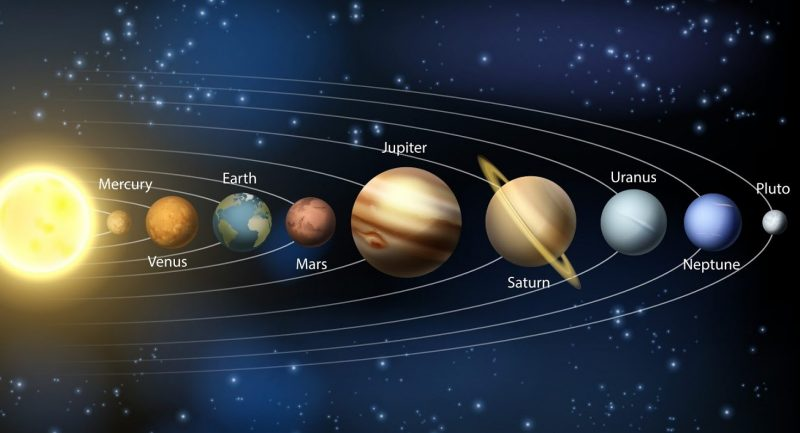

Contamos con el periodo (en días terrestres) y la distancia media al Sol(en km) de cada uno de los planetas del sistema solar.
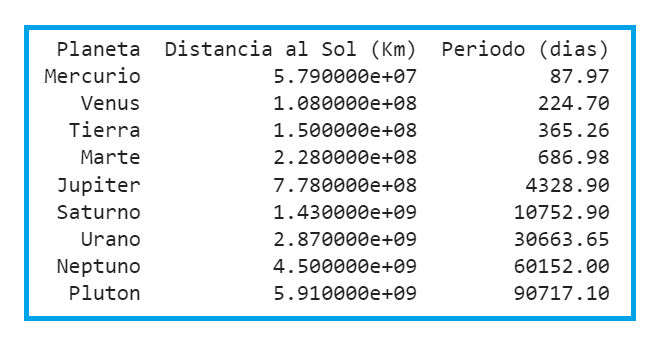

***Queremos encontrar la tercera ley de Kepler a partir de los datos en forma gráfica.***

***¿Cómo procedemos?***
***

Primero importamos las librerías que necesitamos
***

In [ ]:
# Importamos las librerías
import numpy as np  # para trabajar matemática
import pandas as pd # para trabajar con arreglos de datos
import matplotlib.pyplot as plt # para graficar


y cargamos los datos con el archivo "Kepler_ley3"
***

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Kepler_ley3.csv to Kepler_ley3.csv



Guardamos el archivo con los datos en el dataframe "datos"
***

In [ ]:
import io
#guardamos el archivo en "datos"
datos = pd.read_csv(io.BytesIO(uploaded['Kepler_ley3.csv'])) ### si es archivo separado por comas
#datos = pd.read_excel(io.BytesIO(uploaded['datos1.xlsx'])) ### si es archivo excel
print(datos)

    Planeta  Distancia al Sol (Km)  Periodo (dias)
0  Mercurio           5.790000e+07           87.97
1     Venus           1.080000e+08          224.70
2    Tierra           1.500000e+08          365.26
3     Marte           2.280000e+08          686.98
4   Jupiter           7.780000e+08         4328.90
5   Saturno           1.430000e+09        10752.90
6     Urano           2.870000e+09        30663.65
7   Neptuno           4.500000e+09        60152.00
8    Pluton           5.910000e+09        90717.10


Por comodidad, cambiamos el nombre de las variables.
***

In [ ]:
datos = datos.rename(columns={'Distancia al Sol (Km)':'D','Periodo (dias)':'T'})
print(datos)

    Planeta             D         T
0  Mercurio  5.790000e+07     87.97
1     Venus  1.080000e+08    224.70
2    Tierra  1.500000e+08    365.26
3     Marte  2.280000e+08    686.98
4   Jupiter  7.780000e+08   4328.90
5   Saturno  1.430000e+09  10752.90
6     Urano  2.870000e+09  30663.65
7   Neptuno  4.500000e+09  60152.00
8    Pluton  5.910000e+09  90717.10


Para empezar, graficamos los datos.
***

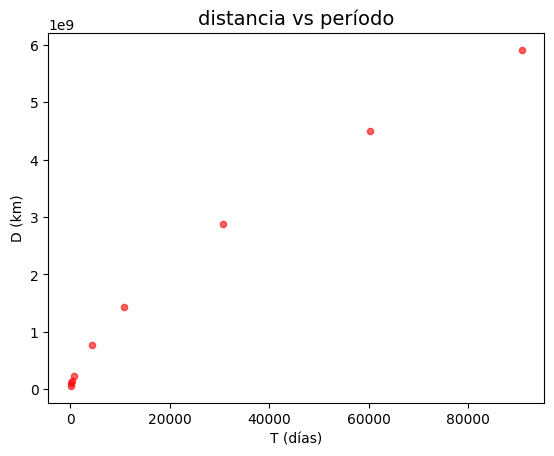

In [ ]:
plt.scatter(datos['T'], datos['D'], color='red', s=20, alpha=0.6) ###
plt.xlabel('T (días)')
plt.ylabel('D (km)')
plt.title('distancia vs período', fontsize=14)
plt.show()

A partir de este gráfico, no es obvio cuál es la relación entre D y T.
***

Vamos a suponer que la relación es del tipo potencial donde el exponente $\alpha$ es el parámetro que queremos encontrar.

\\

\begin{equation}       
   D = cte   \cdot T^{\alpha}  
   \end{equation}

\\

¿Cómo podemos obtener el parámetro $\alpha$ ?

***


Hacemos una tramsformación de variables:aplicamos la función logaritmo

\\
\begin{equation}       
   log [D] = log [cte   \cdot T^{\alpha}]  
   \end{equation}
   
\\

Aplicamos las propiedades del logaritmo y obtenemos:

\\

\begin{equation}       
   log [D] = log [cte] + {\alpha} \cdot    log [T]   
   \end{equation}   
***

Ahora tenemos una relación lineal entra las nuevas variables $log [D]$ y $log [T]$ donde

- la pendiente es el parámetro ${\alpha}$ que buscamos y
- la ordenada es $log [cte]$
***

Antes de aplicar la transformación logaritmo, pasamos las unidades al sistema internacional (no es necesario para encontrar ${\alpha}$ pero lo necesitaremos más adelante):

- la variable D en km la pasamos a metros utilizando 1km=1000m
- la variable T en días la pasamos a segundos utilizando 1día=24hs y 1h=3600s
***


In [ ]:
#cambio de unidades para la variable D
datos['D']=datos['D']*1000
#cambio de unidades para la variable T
datos['T']=datos['T']*3600*24
print(datos)



    Planeta             D             T
0  Mercurio  5.790000e+10  7.600608e+06
1     Venus  1.080000e+11  1.941408e+07
2    Tierra  1.500000e+11  3.155846e+07
3     Marte  2.280000e+11  5.935507e+07
4   Jupiter  7.780000e+11  3.740170e+08
5   Saturno  1.430000e+12  9.290506e+08
6     Urano  2.870000e+12  2.649339e+09
7   Neptuno  4.500000e+12  5.197133e+09
8    Pluton  5.910000e+12  7.837957e+09


Ahora creamos las 2 nuevas variables   $log [D]$ y $log [T]$ aplicando logaritmo a ambas variables originales  $D$ y $T$
***

In [ ]:
logT=np.log10(datos['T'])
logD=np.log10(datos['D'])


Resumiendo lo que hicimos hasta ahora:

Queremos encontrar la tercera ley de Kepler a partir de los datos y escribimos la relación entre T(periodo) y D (distancia)


\begin{equation}       
   D = cte   \cdot T^{\alpha}  
   \end{equation}

de modo que tenemos que encontrar el parámetro $\alpha$

Aplicamos la función logaritmo a esta relación y obtenemos:

\\

\begin{equation}       
   log [D] = log [cte] + {\alpha} \cdot    log [T]   
   \end{equation}   

que es una relación lineal entre las nuevas variables  $log [D]$ y $log [T]$, por lo tanto al graficar $log [D]$ vs $log [T]$ obtenemos una recta cuya pendiente es $\alpha$.
***

 Graficamos $log [D]$ vs $log [T]$
 ***

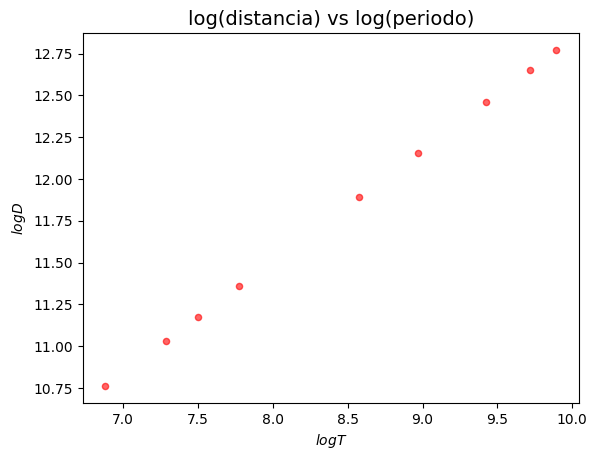

In [ ]:
plt.scatter(logT, logD, color='r', s=20, alpha=0.6)
plt.xlabel('$logT$')
plt.ylabel('$logD$ ')
plt.title('log(distancia) vs log(periodo)', fontsize=14)
plt.show()

Y encontramos que los puntos en estas nuevas variables quedan alineados como esperábamos.
***

Para encontrar $\alpha$, buscamos la recta que mejor ajuste estos datos. Para hacerlo usamos la libreria *sklearn*, en particular necesitamos el objeto *LinearRegression*.
***

In [ ]:
# Creación del modelo
from sklearn.linear_model import LinearRegression

# ==============================================================================

# creamos un objeto de la clase LinearRegression
modelo = LinearRegression()
###Para aplicar el modelo lineal los datos tienen que ser tipo "array", por eso
###convertimos los datos a array
x=np.array(logT)
y=np.array(logD)

# Ajustamos los datos
modelo.fit(X = x.reshape(-1, 1), y = y)

LinearRegression()

Nuestro modelo encontró la recta que mejor ajusta los datos



\begin{equation}       
   y = m \cdot x + b
   \end{equation}   

o sea encontró la pendiente $m$ y la ordenada $b$ de esa recta.
***

In [ ]:
m=modelo.coef_
b=modelo.intercept_
#m = str(m)[1:-1] #eliminar los corchetes de una lista
#m=float(m) # m es string, lo pasamos a float
print('Ordenada: \n  b=',b )
print('Pendiente: \n m=', m)

Ordenada: 
  b= 6.174657329318061
Pendiente: 
 m= [0.66680033]


La ecuación de la recta es
***

In [ ]:
type(m)


numpy.ndarray

In [ ]:
recta=r'logD=%0.3flogT %+0.3f' %(m,b)
print(recta)

logD=0.667logT +6.175



\begin{equation}       
   log [D] =  0,667 \cdot    log [T] + 6,175
   \end{equation}   
   ***

Podemos graficar la recta sobre nuestros datos. Para esto aplicamos la ecuación de la recta a los valores de $logT$.
Esto podemos hacerlo de forma más sencilla con la función *predict* y los guardamos en *y_pred*
***

In [ ]:
### Obtenemos los valores y de la recta de nuestro modelo de regresión lineal
# aplicando la función encontrada a los valores x
y_pred = modelo.predict(x.reshape(-1, 1)) #x.reshape(-1, 1) escribe x como columna

Graficamos la recta  encontrada y los datos originales.
***

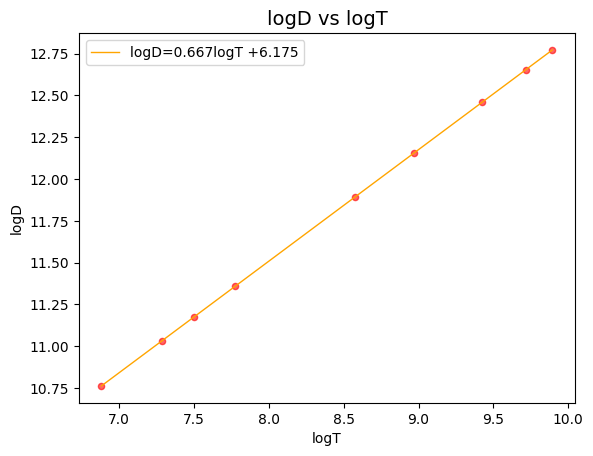

In [ ]:
# graficamos la recta
plt.plot(x, y_pred, color="orange", linewidth=1, label=recta)
# graficamos los datos originales
plt.scatter(logT, logD, color='r', s=20, alpha=0.6) ### s=size
plt.xlabel('logT')
plt.ylabel('logD')
plt.title('logD vs logT', fontsize=14)
plt.legend()
plt.show()

La pendiente $m$ es el parámetro $\alpha$ que buscmos:

$m$= $\alpha$=0.666800033

***

### ***Tercera ley de Kepler***

***Para cualquier planeta, el cuadrado de su período orbital T es directamente proporcional al cubo de la longitud del semieje mayor de su órbita elíptica D***



***\begin{equation}       
   T^2  = k \cdot D^3
   \end{equation}***

   ***con k una constante que no depende del planeta***
   
***



El parámetro  $\alpha$=0,667 encontrado ¿está de acuerdo con esta ley?
***

La constante $k$ en la tercera ley de Kepler es la misma constante que llamamos *cte*? ¿Cuál es la relación entre $k$ y $cte$?
***

Por último, ahora que conocemos la tercera ley de Kepler

\\

\begin{equation}       
   T^2  = k \cdot D^3
   \end{equation}
¿qué otra transformación de las variables podemos utilizar para que la relación sea lineal?
***

In [ ]:
datos['T2']=datos['T']**2
datos['D3']=datos['D']**3

Graficamos en las variables $T^2$  y $D^3$. Además utlizamos escala logarítmica ¿por qué?  y agragamos los nombres de los planetas.

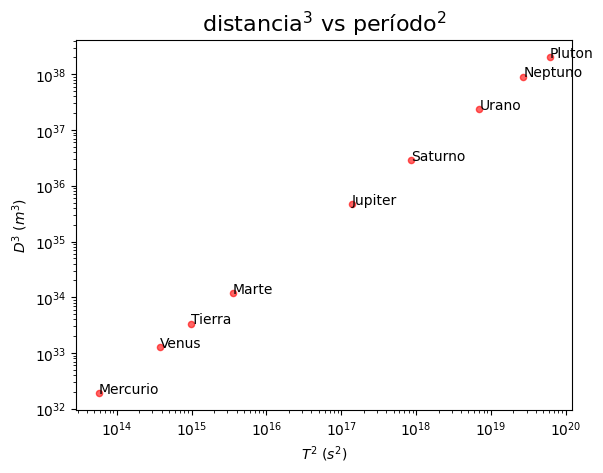

In [ ]:
plt.scatter(datos['T2'], datos['D3'], color='r', s=20, alpha=0.6)
plt.xlabel('$T^2$ ($s^2$)')
plt.ylabel('$D^3$ ($m^3$)')
plt.title('distancia$^3$ vs período$^2$', fontsize=16)
plt.xscale('log') #usamos escala logaritmica (base 10)
plt.yscale('log')
for i, label in enumerate(datos['Planeta']):
    plt.annotate(label, (datos['T2'][i]  , datos['D3'][i]))
plt.show()

In [ ]:

####para agregarle nombre a las columnas del dataframe datos
#datos.columns =['nombre1', 'nombre2',.....]

### para cambiar nombres a las columnas del dataframe datos
#datos = datos.rename(columns={'nombre_viejo1':'nombre_nuevo1','nombre_viejo2':'nombre_nuevo2'})


## ***Ejercicio:verificar la tercera ley de Kepler para los satélites galileanos de Júpiter***

Los satélites galileanos de Júpiter son los satélites más grandes del planeta. Fueron vistos por primera vez por Galileo en 1610. De izquierda a derecha y en orden de alejamiento con respecto a Júpiter: ***Ío, Europa, Ganímedes, Calisto***

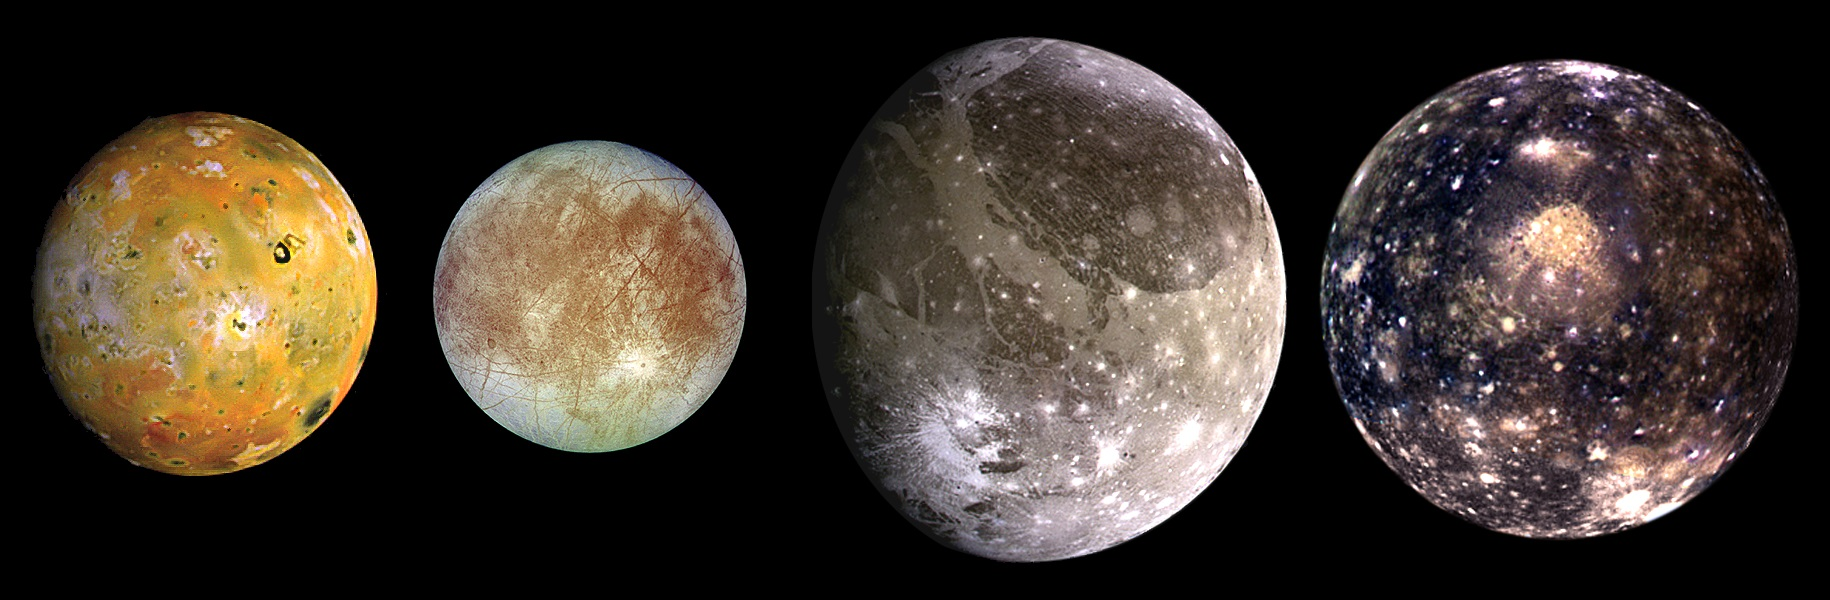

https://photojournal.jpl.nasa.gov/catalog/PIA01299

In [37]:
from google.colab import files


uploaded = files.upload()

Saving satelites_galileanos_1.xlsx to satelites_galileanos_1.xlsx


In [38]:
import io
#guardamos el archivo en "datosJ"
datosJ = pd.read_excel(io.BytesIO(uploaded['satelites_galileanos_1.xlsx'])) ### si es archivo excel
#datosJ = pd.read_csv(io.BytesIO(uploaded['Satélites galileanos.csv'])) ### si es archivo csv
print(datosJ)

   Satélites  Densidad g/cm3  Radio medio (km)  Radio orbita (km)  \
0         Io            3.53              1820             421600   
1     Europa            3.03              1565             670900   
2  Ganimedes            1.93              2638            1070000   
3    Calisto            1.83              2410            1880000   

   Periodo (días)  
0            1769  
1            3551  
2            7155  
3           16689  


Por comodidad, cambiamos el nombre de las variables.
***

In [40]:
datosJ = datosJ.rename(columns={'Radio orbita (km)':'D','Periodo (días)':'T'})
print(datosJ)

   Satélites  Densidad g/cm3  Radio medio (km)        D      T
0         Io            3.53              1820   421600   1769
1     Europa            3.03              1565   670900   3551
2  Ganimedes            1.93              2638  1070000   7155
3    Calisto            1.83              2410  1880000  16689


Graficamos los datos.
***

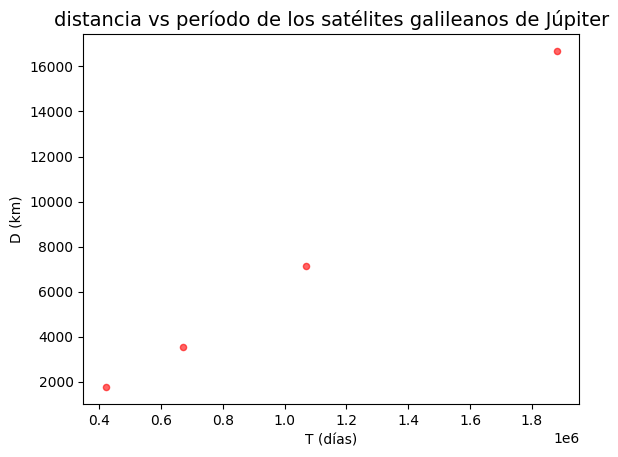

In [42]:
plt.scatter(datosJ['D'], datosJ['T'], color='red', s=20, alpha=0.6) ###
plt.xlabel('T (días)')
plt.ylabel('D (km)')
plt.title('distancia vs período de los satélites galileanos de Júpiter', fontsize=14)
plt.show()

Pasamos la distancia a metros y el periodo a segundos:
***

In [44]:
#cambio de unidades para la variable D
datosJ['D']=datosJ['D']*1000
#cambio de unidades para la variable T
datosJ['T']=datosJ['T']*3600*24


Aplicamos logaritmo en base 10:
***

In [45]:
logT_J=np.log10(datosJ['T'])
logD_J=np.log10(datosJ['D'])

In [46]:
# Creación del modelo
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
# ==============================================================================

# creamos un objeto de la clase LinearRegression
modeloJ = LinearRegression()
###Para aplicar el modelo lineal los datos tienen que ser tipo "array", por eso
###convertimos los datos a array
x=np.array(logT_J)
y=np.array(logD_J)

# Ajustamos los datos
modeloJ.fit(X = x.reshape(-1, 1), y = y)

LinearRegression()

In [47]:
mJ=modeloJ.coef_
bJ=modeloJ.intercept_
#mJ = str(mJ)[1:-1] #eliminar los corchetes de una lista
#mJ=float(mJ) # m es string, lo pasamos a float
print('Ordenada: \n b=',bJ )
print('Pendiente: \n m=', mJ)

Ordenada: 
 b= 3.1733822768605364
Pendiente: 
 m= [0.66611176]


In [48]:
### Obtenemos los valores y de la recta de nuestro modelo de regresión lineal
# aplicando la función encontrada a los valores x
y_predJ = modeloJ.predict(x.reshape(-1, 1)) #x.reshape(-1, 1) escribe x como columna

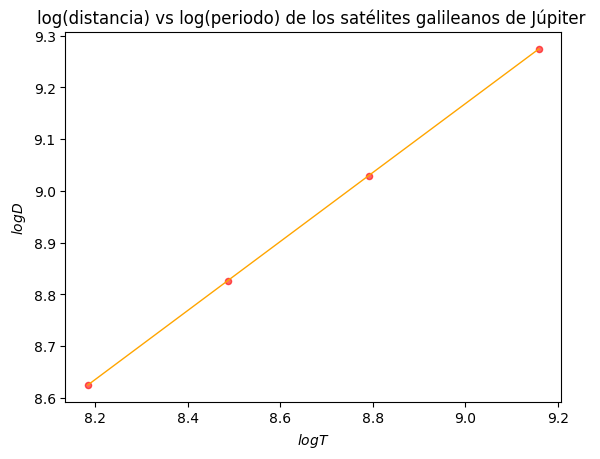

In [55]:
# graficamos los datos originales
plt.scatter(logT_J, logD_J, color='r', s=20, alpha=0.6)
# graficamos la recta
plt.plot(logT_J, logD_J, color="orange", linewidth=1, label=recta)
plt.xlabel('$logT$')
plt.ylabel('$logD$ ')
plt.title('log(distancia) vs log(periodo) de los satélites galileanos de Júpiter ', fontsize=12)
plt.show()

In [65]:
datosJ['T2_J']=datosJ['T']**2
datosJ['D3_J']=datosJ['D']**3

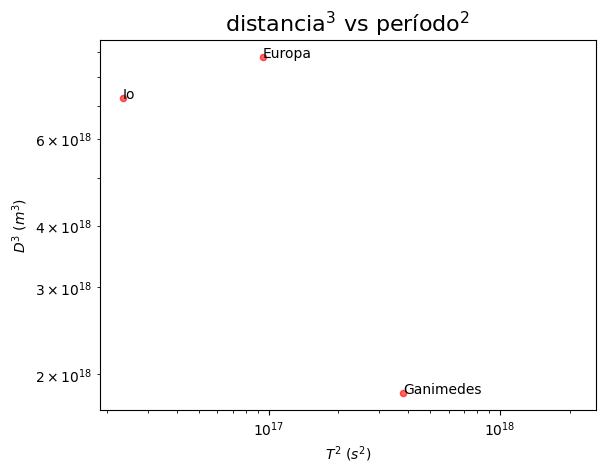

In [69]:
plt.scatter(datosJ['T2_J'], datosJ['D3_J'], color='r', s=20, alpha=0.6)
plt.xlabel('$T^2$ ($s^2$)')
plt.ylabel('$D^3$ ($m^3$)')
plt.title('distancia$^3$ vs período$^2$', fontsize=16)
plt.xscale('log') #usamos escala logaritmica (base 10)
plt.yscale('log')
for i, label in enumerate(datosJ['Satélites']):
    plt.annotate(label, (datosJ['T2'][i]  , datosJ['D3'][i]))
plt.show()